In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
import sys
sys.path.insert(1, '../src/')
from convex_bodies import GeneratePolygon
from data_generator import DataGenerator
from optimize import LinearAlgorithmOptimization, get_optimization_args
from utils import plot_housdorf_distance_vs_k, plot_housdorf_distance_vs_noise

## Hyparams

In [4]:
N = 2
CENTROID = [0,0]
NUM_VERTICES = 8
RIGHT = False

K = 50
UNIFORM_DIRECTIONS = True
HIGH_LIM = 2*np.pi
RANDOM_SEED = 42.0
SIGMA = 0.01
X_0_INIT_RANDOM = True


polygon_args = {
                "centroid":CENTROID,
                "num_vertices":NUM_VERTICES,
                "right":RIGHT,
                "random_seed":RANDOM_SEED
}

approximation_args = {
                      "k":K,
                      "sigma":SIGMA,
                      "uniform_directions":UNIFORM_DIRECTIONS,
                      "high_lim":HIGH_LIM,
                      "x_0_init_random":X_0_INIT_RANDOM,
                      "seed":RANDOM_SEED
}

# Generate Polygon

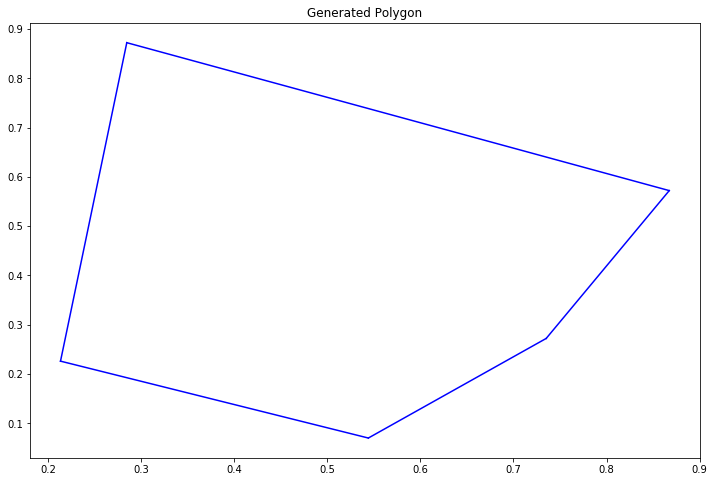

In [5]:
poly_generator = GeneratePolygon()
polygon,vertices = poly_generator.generate(polygon_args)
polygon.plot_body()

# Generate Directions

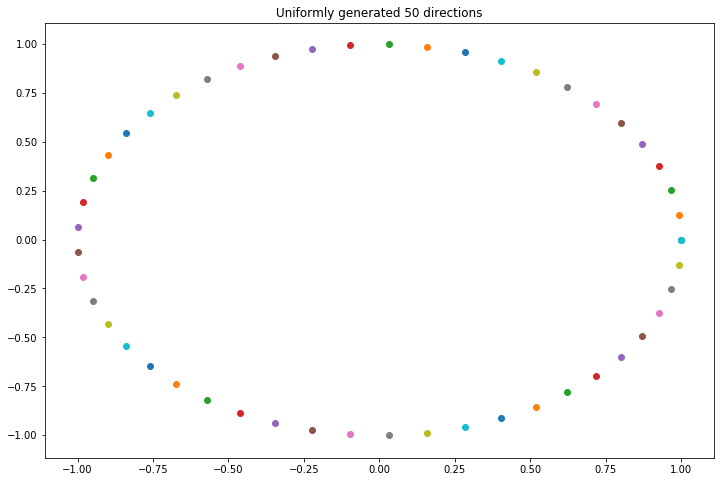

In [6]:
datagen = DataGenerator(d=N)
us = datagen.generate_us(**approximation_args)
datagen.plot_us(us)

# Calculate noise support functions

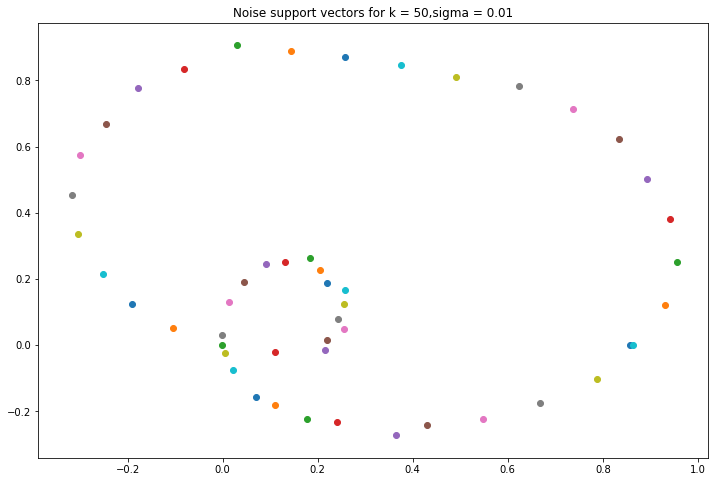

In [7]:
noise_supports = datagen.generate_noise_support(body=polygon,us=us,sigma=SIGMA)
datagen.plot_noise_supports(us,noise_supports)

# Reconstruct body, with noise support functions(linear program algorithm)

In [8]:
Y, U, X = datagen.get_optimization_params(noise_supports,us,x_random_init=X_0_INIT_RANDOM)
optimization_args = get_optimization_args(X,Y,U,approximation_args)

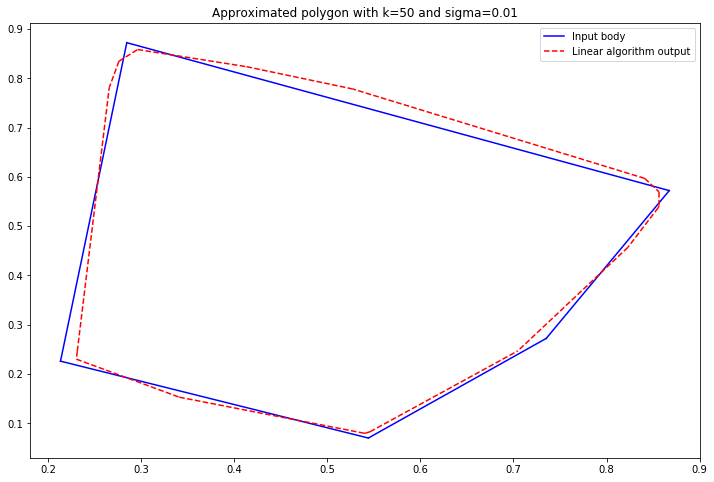

In [9]:
solver = LinearAlgorithmOptimization(**optimization_args)
solution = solver.optimize()
X_ = solution.x
X_ = X_.reshape(-1,2)
polygon.plot_approximation(X_,**approximation_args)

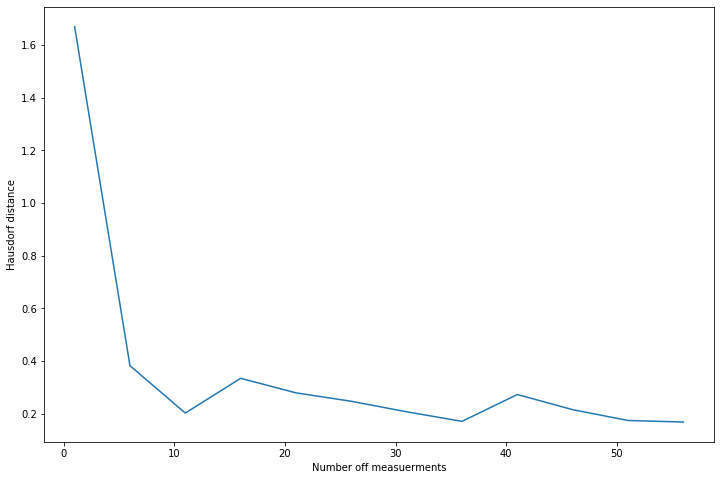

In [46]:
plot_args = {
                  "k_range":60,
                  "step_size":5,
                  "sigma":0.1,
                  "uniform_directions":UNIFORM_DIRECTIONS,
                  "high_lim":HIGH_LIM,
                  "x_0_init_random":X_0_INIT_RANDOM,
                  "seed":RANDOM_SEED
}
    
dists = plot_housdorf_distance_vs_k(polygon,**plot_args)

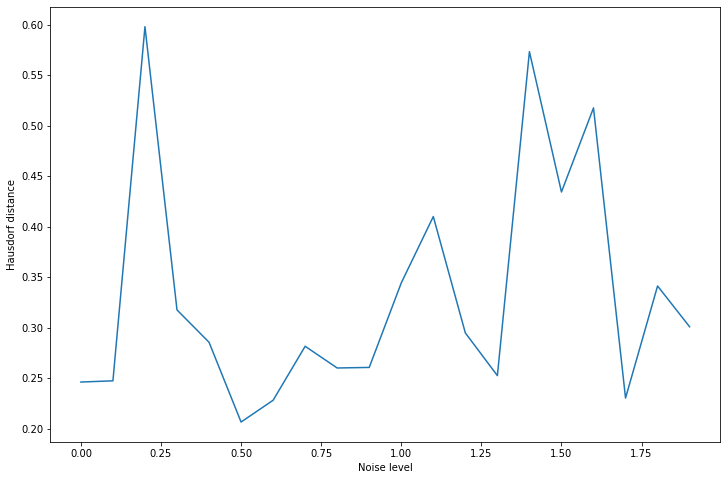

In [47]:
plot_args = {
                  "k":50,
                  "sigma_range":2,
                  "step_size":0.1,
                  "sigma":0.1,
                  "uniform_directions":UNIFORM_DIRECTIONS,
                  "high_lim":HIGH_LIM,
                  "x_0_init_random":X_0_INIT_RANDOM,
                  "seed":RANDOM_SEED
}
    
dists = plot_housdorf_distance_vs_noise(polygon,**plot_args)

